In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
import tqdm

import seaborn as sns

# if you have recent matplotlib versions it spamms deprecation warnings
# these two lines remove the problem
import warnings
warnings.filterwarnings("ignore", module = "matplotlib\..*" )

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import math
#!pip list

In [2]:
data='/Users/alessandrobreccia/Desktop/1_ANNO_MAGISTR/2_semester/LabCompB/Project/Plethysmography/data'

# importing
data_1 = pd.read_csv(data+'/1.csv', sep=',')
data_2 = pd.read_csv(data+'/2.csv', sep=',')
data_3 = pd.read_csv(data+'/3.csv', sep=',')
data_4 = pd.read_csv(data+'/4.csv', sep=',')
data_5 = pd.read_csv(data+'/5.csv', sep=',')
data_6 = pd.read_csv(data+'/6.csv', sep=',')
data_7 = pd.read_csv(data+'/7.csv', sep=',')
data_8 = pd.read_csv(data+'/8.csv', sep=',')
data_9 = pd.read_csv(data+'/9.csv', sep=',')
data_10 = pd.read_csv(data+'/10.csv', sep=',')
data_11 = pd.read_csv(data+'/11.csv', sep=',')
data_12 = pd.read_csv(data+'/12.csv', sep=',')
data_13 = pd.read_csv(data+'/13.csv', sep=',')
data_14 = pd.read_csv(data+'/14.csv', sep=',')
data_15 = pd.read_csv(data+'/15.csv', sep=',')
data_16 = pd.read_csv(data+'/16.csv', sep=',')
data_17 = pd.read_csv(data+'/17.csv', sep=',')
data_18 = pd.read_csv(data+'/18.csv', sep=',')
data_19 = pd.read_csv(data+'/19.csv', sep=',')
data_20 = pd.read_csv(data+'/20.csv', sep=',')


# Normalization of the data
data_1[['plety','ECG']] -= data_1[['plety','ECG']].mean() 
data_1[['plety','ECG']] /= data_1[['plety','ECG']].std()
data_2[['plety','ECG']] -= data_2[['plety','ECG']].mean() 
data_2[['plety','ECG']] /= data_2[['plety','ECG']].std()
data_3[['plety','ECG']] -= data_3[['plety','ECG']].mean() 
data_3[['plety','ECG']] /= data_3[['plety','ECG']].std()
data_4[['plety','ECG']] -= data_4[['plety','ECG']].mean() 
data_4[['plety','ECG']] /= data_4[['plety','ECG']].std()
data_5[['plety','ECG']] -= data_5[['plety','ECG']].mean() 
data_5[['plety','ECG']] /= data_5[['plety','ECG']].std()
data_6[['plety','ECG']] -= data_6[['plety','ECG']].mean() 
data_6[['plety','ECG']] /= data_6[['plety','ECG']].std()
data_7[['plety','ECG']] -= data_7[['plety','ECG']].mean() 
data_7[['plety','ECG']] /= data_7[['plety','ECG']].std()
data_8[['plety','ECG']] -= data_8[['plety','ECG']].mean() 
data_8[['plety','ECG']] /= data_8[['plety','ECG']].std()
data_9[['plety','ECG']] -= data_9[['plety','ECG']].mean() 
data_9[['plety','ECG']] /= data_9[['plety','ECG']].std()
data_10[['plety','ECG']] -= data_10[['plety','ECG']].mean() 
data_10[['plety','ECG']] /= data_10[['plety','ECG']].std()
data_11[['plety','ECG']] -= data_11[['plety','ECG']].mean() 
data_11[['plety','ECG']] /= data_11[['plety','ECG']].std()
data_12[['plety','ECG']] -= data_12[['plety','ECG']].mean() 
data_12[['plety','ECG']] /= data_12[['plety','ECG']].std()
data_13[['plety','ECG']] -= data_13[['plety','ECG']].mean() 
data_13[['plety','ECG']] /= data_13[['plety','ECG']].std()
data_14[['plety','ECG']] -= data_14[['plety','ECG']].mean() 
data_14[['plety','ECG']] /= data_14[['plety','ECG']].std()
data_15[['plety','ECG']] -= data_15[['plety','ECG']].mean() 
data_15[['plety','ECG']] /= data_15[['plety','ECG']].std()
data_16[['plety','ECG']] -= data_16[['plety','ECG']].mean() 
data_16[['plety','ECG']] /= data_16[['plety','ECG']].std()
data_17[['plety','ECG']] -= data_17[['plety','ECG']].mean() 
data_17[['plety','ECG']] /= data_17[['plety','ECG']].std()
data_18[['plety','ECG']] -= data_18[['plety','ECG']].mean() 
data_18[['plety','ECG']] /= data_18[['plety','ECG']].std()
data_19[['plety','ECG']] -= data_19[['plety','ECG']].mean() 
data_19[['plety','ECG']] /= data_19[['plety','ECG']].std()
data_20[['plety','ECG']] -= data_20[['plety','ECG']].mean() 
data_20[['plety','ECG']] /= data_20[['plety','ECG']].std()

list_data=[data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12,data_13,data_14,data_15,data_16,data_17,data_18,data_19,data_20]

# import labeled peaks A
peaks_path = '/Users/alessandrobreccia/Desktop/1_ANNO_MAGISTR/2_semester/LabCompB/Project/Plethysmography/peaksfolder'
peak_a_1 = pd.read_csv( peaks_path+'/a_peak_1.txt' , sep="," , dtype=int)
peak_a_2 = pd.read_csv( peaks_path+'/a_peak_2.txt' , sep="," , dtype=int)
peak_a_3 = pd.read_csv( peaks_path+'/a_peak_3.txt' , sep="," , dtype=int)
peak_a_4 = pd.read_csv( peaks_path+'/a_peak_4.txt' , sep="," , dtype=int)
peak_a_5 = pd.read_csv( peaks_path+'/a_peak_5.txt' , sep="," , dtype=int)
peak_a_6 = pd.read_csv( peaks_path+'/a_peak_6.txt' , sep="," , dtype=int)
peak_a_7 = pd.read_csv( peaks_path+'/a_peak_7.txt' , sep="," , dtype=int)

peak_a_list = [peak_a_1,peak_a_2,peak_a_3,peak_a_4,peak_a_5,peak_a_6,peak_a_7]


for i in range(7):
    p= list(map(int,peak_a_list[i]))
    d= list_data[i]['plety']
    t = np.zeros(len(d))
    t[p] = 1
    peak_a_list[i] = t

peak_a_1 = peak_a_list[0]
peak_a_2 = peak_a_list[1]
peak_a_3 = peak_a_list[2]
peak_a_4 = peak_a_list[3]
peak_a_5 = peak_a_list[4]
peak_a_6 = peak_a_list[5]
peak_a_7 = peak_a_list[6]

# import labeled peaks X'
peak_x_1 = pd.read_csv( peaks_path+'/x_prime_peak_1.txt' , sep="," , dtype=int)
peak_x_2 = pd.read_csv( peaks_path+'/x_prime_peak_2.txt' , sep="," , dtype=int)
peak_x_3 = pd.read_csv( peaks_path+'/x_prime_peak_3.txt' , sep="," , dtype=int)
peak_x_4 = pd.read_csv( peaks_path+'/x_prime_peak_4.txt' , sep="," , dtype=int)
peak_x_5 = pd.read_csv( peaks_path+'/x_prime_peak_5.txt' , sep="," , dtype=int)
peak_x_6 = pd.read_csv( peaks_path+'/x_prime_peak_6.txt' , sep="," , dtype=int)
peak_x_7 = pd.read_csv( peaks_path+'/x_prime_peak_7.txt' , sep="," , dtype=int)

peak_x_list = [peak_x_1,peak_x_2,peak_x_3,peak_x_4,peak_x_5,peak_x_6,peak_x_7]

for i in range(7):
    p= list(map(int,peak_x_list[i]))
    d= list_data[i]['plety']
    t = np.zeros(len(d))
    t[p] = 1
    peak_x_list[i] = t

peak_x_1 = peak_x_list[0]
peak_x_2 = peak_x_list[1]
peak_x_3 = peak_x_list[2]
peak_x_4 = peak_x_list[3]
peak_x_5 = peak_x_list[4]
peak_x_6 = peak_x_list[5]
peak_x_7 = peak_x_list[6]

peak_x = np.concatenate((peak_x_1,peak_x_2,peak_x_3,peak_x_4,peak_x_5,peak_x_6,peak_x_7), axis = None)

peak_a = np.concatenate((peak_a_1,peak_a_2,peak_a_3,peak_a_4,peak_a_5,peak_a_6,peak_a_7), axis = None)
datatrain = np.concatenate((data_1,data_2,data_3,data_4,data_5,data_6,data_7), axis = 0)
datatest = np.concatenate((data_8,data_9,data_10,data_11,data_12,data_13,data_14,data_15,data_16,data_17,data_18,data_19,data_20), axis = 0)

In [38]:
from keras.utils import to_categorical

# Labels
data = np.column_stack(( datatrain, 2*peak_x + peak_a ))

# Switch to categorical representation of the labels
new_labels = to_categorical(data[:,4])

sequence_length = 25

# create input/output sequences for LSTM
X = []
y = []
for i in range(len(data) - sequence_length):
   # if sum(data[i:i+sequence_length, 4]) == 1: 
        X.append(data[i:i+sequence_length, [1]])
        y.append(new_labels[i:i+sequence_length].flatten())
        
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0.85)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

permutation_train = np.random.permutation(X_train.shape[0])
X_train = X_train[permutation_train]
y_train = y_train[permutation_train]

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')
print(f'Testing shape: {y_test.shape}')

Training shape: (21136, 25, 1)
Testing shape: (3731, 25, 1)
Testing shape: (3731, 75)


In [39]:
weight_for_0 = len(data[:,4]) / len(np.where(data[:,4]==0)[0])
weight_for_1 = len(data[:,4]) / len(np.where(data[:,4]==1)[0])
weight_for_2 = len(data[:,4]) / len(np.where(data[:,4]==2)[0])

weights = {0:int(weight_for_0), 1:int(weight_for_1), 2:int(weight_for_2)}

In [40]:
print(weights)

{0: 1, 1: 64, 2: 61}


In [395]:
from tensorflow.keras import regularizers

input_shape = (X_train.shape[1], X_train.shape[2])

fc_size = sequence_length

## Model Definition
def Mod(type = 'CNN'):
        if (type == 'CNN'):
            input_data = keras.layers.Input(shape=input_shape, name='input0')

            conv1 = keras.layers.Conv1D( 64, 12 , activation='tanh', input_shape=input_shape[1:], name='filter1', kernel_regularizer=regularizers.L2(1e-2) )(input_data)

            #pool1 = keras.layers.AvgPool1D(pool_size=2, strides=None, padding='valid', data_format='channels_last', name='pool1')(conv1)

            conv2 = keras.layers.Conv1D( 16 , 4, activation='tanh', name='filter2')(conv1)

            conv3 = keras.layers.Conv1D( 8 , 4, activation='tanh', name='filter3')(conv2)

            #drop1 = keras.layers.Dropout(0.2)(conv3)

            #pool2 = keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last', name='pool2')(conv3)

            flat = keras.layers.Flatten()(conv3)

            fc0 = keras.layers.Dense(256, activation=tf.nn.relu,  kernel_initializer='glorot_uniform', bias_initializer='zeros', name='fc0')(flat)

            #fc1 = keras.layers.Dense(64, activation=tf.nn.relu,  kernel_initializer='glorot_uniform', bias_initializer='zeros', name='fc1')(fc0)

            #fc2= keras.layers.Dense(64, activation=tf.nn.relu,  kernel_initializer='glorot_uniform', bias_initializer='zeros', name='fc2')(fc1)

            #drop2 = keras.layers.Dropout(0.2)(fc0)

            #fc1 = keras.layers.Dense(sequence_length*3*2, activation=tf.nn.relu,  kernel_initializer='glorot_uniform', bias_initializer='zeros', name='fc1')(fc0)

            output1 = keras.layers.Dense(sequence_length*3, activation=tf.nn.sigmoid, kernel_initializer='glorot_uniform', bias_initializer='zeros', name='output1', )(fc0)

        elif (type == 'LSTM'):
            input_data = keras.layers.Input(shape=input_shape, name='input0')

            lstm = keras.layers.Bidirectional(LSTM(10, return_sequences=True, dropout=0.1, input_shape=input_shape[1:]))(input_data)

            flat = keras.layers.Flatten()(lstm)
            
            fc0 = keras.layers.Dense(32, activation=tf.nn.relu,  kernel_initializer='glorot_uniform', bias_initializer='zeros', name='fc0')(flat)

            fc1 = keras.layers.Dense(16, activation=tf.nn.relu,  kernel_initializer='glorot_uniform', bias_initializer='zeros', name='fc1')(fc0)

            drop2 = keras.layers.Dropout(0.2)

            output1 = keras.layers.Dense(sequence_length*3, activation=tf.nn.sigmoid, kernel_initializer='glorot_uniform', bias_initializer='zeros', name='output1', )(fc1) 

        else:
            print('Error: model selected not implemented!')

            return 0    
   
        model = keras.models.Model(inputs=[input_data], outputs=[output1])
        
        return model

In [396]:
adam = keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
rms = keras.optimizers.legacy.RMSprop(learning_rate=0.0002 )
es = keras.callbacks.EarlyStopping(monitor='val_precision', mode='max', verbose=1, patience=10, start_from_epoch=50 )

type='CNN'

model = Mod(type)
model.summary()

model.compile(optimizer=rms,
              loss='categorical_crossentropy',
              metrics = ['Precision','FalseNegatives','TruePositives'], )

history = model.fit(X_train, y_train, epochs=200, validation_split = 0.2, batch_size = 32, callbacks=[es])
            

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input0 (InputLayer)         [(None, 25, 1)]           0         
                                                                 
 filter1 (Conv1D)            (None, 14, 128)           1664      
                                                                 
 filter2 (Conv1D)            (None, 11, 16)            8208      
                                                                 
 filter3 (Conv1D)            (None, 8, 8)              520       
                                                                 
 flatten_30 (Flatten)        (None, 64)                0         
                                                                 
 fc0 (Dense)                 (None, 256)               16640     
                                                                 
 output1 (Dense)             (None, 75)                192

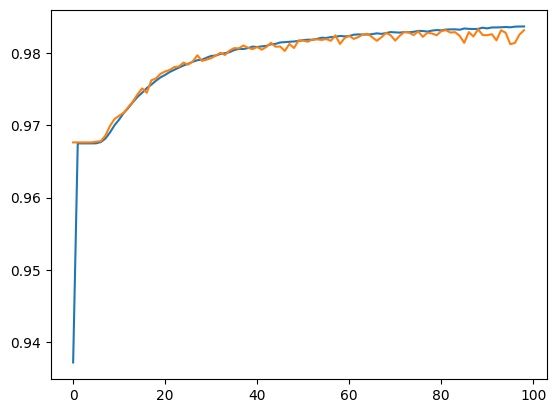

In [397]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])

In [398]:
p = model.predict(X_test)
pred_y = np.zeros((len(y_test),sequence_length))
y_test_2 = np.zeros((len(y_test),sequence_length))

for i in range(len(p)):
    a = np.argmax(np.reshape(p[i], (sequence_length,3)) , axis=1) 
    # mapping 0 in 0, 1 in 1, 2 in -1
    pred_y[i] = a*5/2 -3/2*a*a
    y_test_2[i] = np.argmax(np.reshape(y_test[i], (sequence_length,3)) , axis=1) 

print(len(pred_y))

117/117 [==============================] - 0s 539us/step
3731


In [399]:
threshold = 0.2

def plot_labels(i):
        fig = plt.figure(figsize=(20,8))
        plt.plot(X_test[i])
        plt.plot(np.where(pred_y[i]>threshold)[0],  X_test[i][pred_y[i]>threshold], 'o', color = 'red' , label = 'pred peak a')
        plt.plot(np.where(pred_y[i]<-1*threshold)[0],  X_test[i][pred_y[i]<-1*threshold], 'o', color = 'green' , label = 'pred peak x')
        plt.plot(np.where(y_test_2[i]==1)[0],  X_test[i][y_test_2[i]==1], 'x', color = 'black' ,markersize=18, label = 'true a')
        plt.plot(np.where(y_test_2[i]==2)[0],  X_test[i][y_test_2[i]==2], 'x', color = 'purple' ,markersize=18, label = 'true x')
        plt.legend()

from ipywidgets import interact, IntSlider

slider = IntSlider(min=0, max=len(pred_y), step=1, value=0)
interact(plot_labels, i=slider)

interactive(children=(IntSlider(value=0, description='i', max=3731), Output()), _dom_classes=('widget-interact…

<function __main__.plot_labels(i)>

In [400]:
for i in range(len(pred_y)-sequence_length+1):
        if i==0:
                pred_y_plot = np.column_stack( ( pred_y[i], np.arange(i,i+sequence_length,1)) )
        else:
                pred_y_plot = np.row_stack( (pred_y_plot, np.column_stack( ( pred_y[i], np.arange(i,i+sequence_length,1)) )))      

df = pd.DataFrame(pred_y_plot,  columns=['pred','ind'])
df = df.groupby('ind').mean('pred')  

In [401]:
for i in range(len(X_test)-sequence_length+1):
        if i==0:
                xtest_y_plot = np.column_stack( (X_test[i,:,0] , np.arange(i,i+sequence_length,1), y_test_2[i]) )
        else:
                xtest_y_plot = np.row_stack( (xtest_y_plot, np.column_stack( (X_test[i,:,0], np.arange(i,i+sequence_length,1), y_test_2[i]) )))      

df_x = pd.DataFrame(xtest_y_plot,  columns=['x_test','ind', 'y_test'])
df_x = df_x.groupby('ind').mean('x_test', 'y_test')  

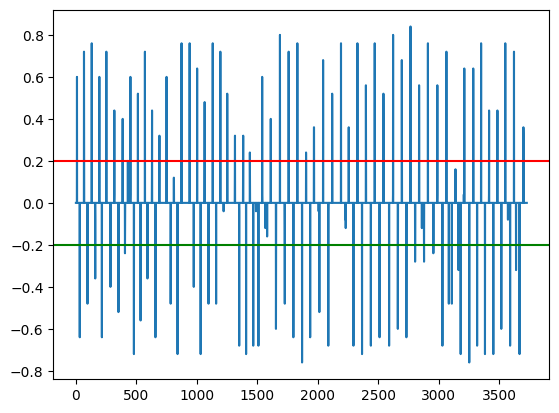

In [402]:

plt.plot(df['pred'])
plt.axhline(y=threshold, color='red')
plt.axhline(y=-threshold, color='green')

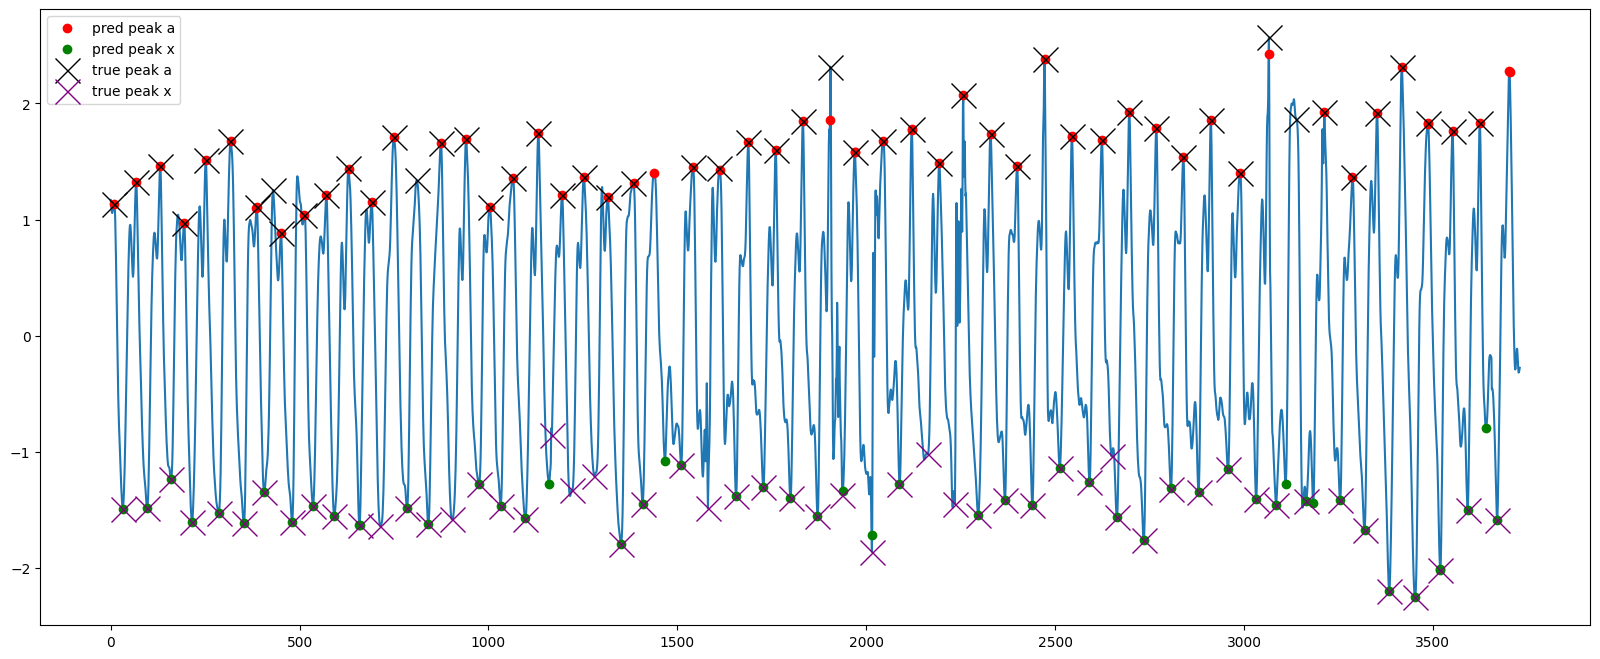

In [403]:
fig = plt.figure(figsize=(20,8))
plt.plot(df_x['x_test'])
plt.plot(np.where(df['pred']>threshold)[0],  df_x['x_test'][df['pred']>threshold], 'o', color = 'red' , label = 'pred peak a')
plt.plot(np.where(df['pred']<-1*threshold)[0],  df_x['x_test'][df['pred']<-1*threshold], 'o', color = 'green' , label = 'pred peak x')
plt.plot(np.where(df_x['y_test']==1)[0],  df_x['x_test'][df_x['y_test']==1], 'x', color = 'black', markersize=18 , label = 'true peak a')
plt.plot(np.where(df_x['y_test']==2)[0],  df_x['x_test'][df_x['y_test']==2], 'x', color = 'purple', markersize=18 , label = 'true peak x')
plt.legend()

In [404]:
print("Actual A peaks:", len(np.where(df_x['y_test']==1)[0]))
print("Predicted label:", len(np.where(df['pred']>threshold)[0]))

print("Actual X peaks:", len(np.where(df_x['y_test']==2)[0]))
print("Predicted label:", len(np.where(df['pred']<-1*threshold)[0]))

lab_0_pos = np.where(df_x['y_test']==0)[0]
pred_0_pos = np.where(np.logical_and( df['pred']>-1*threshold, df['pred']<threshold) )[0]

lab_a_pos = np.where(df_x['y_test']==1)[0]
pred_a_pos = np.where(df['pred']>threshold)[0]

lab_x_pos = np.where(df_x['y_test']==2)[0]
pred_x_pos = np.where(df['pred']<-1*threshold)[0]

print("Actual vs Predicted A peaks")
print(lab_a_pos)
print(pred_a_pos)

print("Actual vs Predicted X peaks")
print(lab_x_pos)
print(pred_x_pos)

true_posi_a = len(np.intersect1d(lab_a_pos, pred_a_pos))
true_posi_x = len(np.intersect1d(lab_x_pos, pred_x_pos))
true_posi_0 = len(np.intersect1d(lab_0_pos, pred_0_pos))

pred_a_lab_0 = len(np.intersect1d(lab_0_pos, pred_a_pos))
pred_x_lab_0 = len(np.intersect1d(lab_0_pos, pred_x_pos))
pred_0_lab_a = len(np.intersect1d(lab_a_pos, pred_0_pos))
pred_x_lab_a = len(np.intersect1d(lab_a_pos, pred_x_pos))
pred_0_lab_x = len(np.intersect1d(lab_x_pos, pred_0_pos))
pred_a_lab_x = len(np.intersect1d(lab_x_pos, pred_a_pos))

for z in lab_a_pos:
    if z not in pred_a_pos:
        if z+1 in pred_a_pos or z-1 in pred_a_pos:
            true_posi_a += 1
            if z in pred_0_pos:
                pred_0_lab_a -=1
                pred_a_lab_0 -=1
            elif z in pred_x_pos:
                pred_x_lab_a -=1
                pred_a_lab_x -=1
            

for z in lab_x_pos:
    if z not in pred_x_pos:
        if z+1 in pred_x_pos or z-1 in pred_x_pos:
            true_posi_x += 1
            if z in lab_0_pos:
                pred_0_lab_x -=1
                pred_x_lab_0 -=1
            else:
                pred_a_lab_x -=1
                pred_x_lab_a -=1


print("The A-A score is", round(true_posi_a/len(lab_a_pos),4))
print("The X-X score is", round(true_posi_x/len(lab_x_pos),4))
print("The 0-0 score is", round(true_posi_0/len(lab_0_pos),4))

Actual A peaks: 54
Predicted label: 59
Actual X peaks: 55
Predicted label: 53
Actual vs Predicted A peaks
[   9   67  131  194  252  317  387  430  451  513  571  629  691  749
  810  874  941 1003 1065 1132 1195 1253 1316 1383 1542 1611 1688 1760
 1832 1905 1970 2045 2120 2193 2257 2329 2400 2472 2544 2624 2696 2768
 2839 2912 2990 3066 3138 3213 3288 3352 3418 3487 3552 3624]
[   9   67  131  194  252  318  386  387  451  513  571  630  691  750
  874  941 1003 1065 1132 1195 1252 1316 1384 1439 1541 1612 1688 1760
 1832 1904 1969 1970 2045 2120 2121 2193 2257 2329 2399 2472 2544 2545
 2624 2696 2768 2839 2912 2990 3065 3213 3287 3352 3418 3486 3487 3552
 3624 3702 3703]
Actual vs Predicted X peaks
[  32   96  160  215  286  352  407  480  535  592  659  714  784  841
  904  975 1032 1098 1168 1222 1280 1351 1408 1510 1581 1655 1728 1800
 1871 1937 2015 2088 2163 2234 2296 2367 2440 2512 2591 2650 2664 2735
 2807 2880 2957 3032 3085 3165 3254 3319 3384 3453 3520 3592 3670]
[  32   96

0.996134732192159
0.8333333333333333
1.0


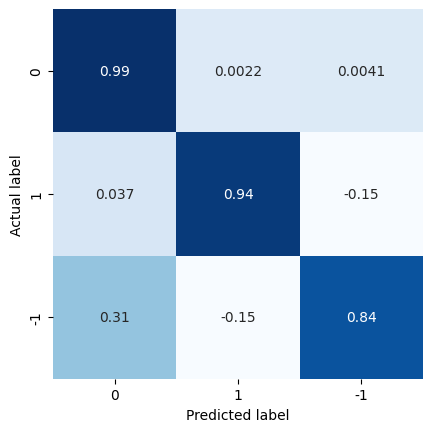

In [405]:
import seaborn as sns

normalize = True



mat = np.array(confusion_matrix(df_x['y_test'], df['pred']>threshold), dtype=float)

if normalize:
    mat[0,0] = true_posi_0/len(lab_0_pos)
    mat[0,1] = pred_a_lab_0/len(lab_0_pos)
    mat[0,2] = pred_x_lab_0/len(lab_0_pos)
    mat[1,0] = pred_0_lab_a/len(lab_a_pos)
    mat[1,1] = true_posi_a/len(lab_a_pos)
    mat[1,2] = pred_x_lab_a/len(lab_a_pos)
    mat[2,0] = pred_0_lab_x/len(lab_x_pos)
    mat[2,1] = pred_a_lab_x/len(lab_x_pos)
    mat[2,2] = true_posi_x/len(lab_x_pos)
    

    #mat[0,1] = mat[0,1]/len(df_x['y_test'][df_x['y_test'] == 0])
    #mat[1,0] = 1-true_posi_a/len(lab_a_pos)
    
print( mat[0,0]+ mat[0,1]+ mat[0,2])
print( mat[1,0]+ mat[1,1]+ mat[1,2])
print( mat[2,0]+ mat[2,1]+ mat[2,2])

labels = ['0', '1','-1']
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [406]:
def plot_weights(name,n_rows,n_col):

    w , _ = model.get_layer(name).get_weights()
    fig, axes = plt.subplots(n_rows,n_col,figsize=(20,8))
    
    if name=='filter1':
            for i, ax in enumerate(axes.flat):
                ax.plot(w[:,:,i])
    else:
            for i, ax in enumerate(axes.flat):
                ax.imshow(w[:,:,i], vmin=np.min(w), vmax=np.max(w),
                interpolation='nearest', cmap='seismic')         

    plt.show()         


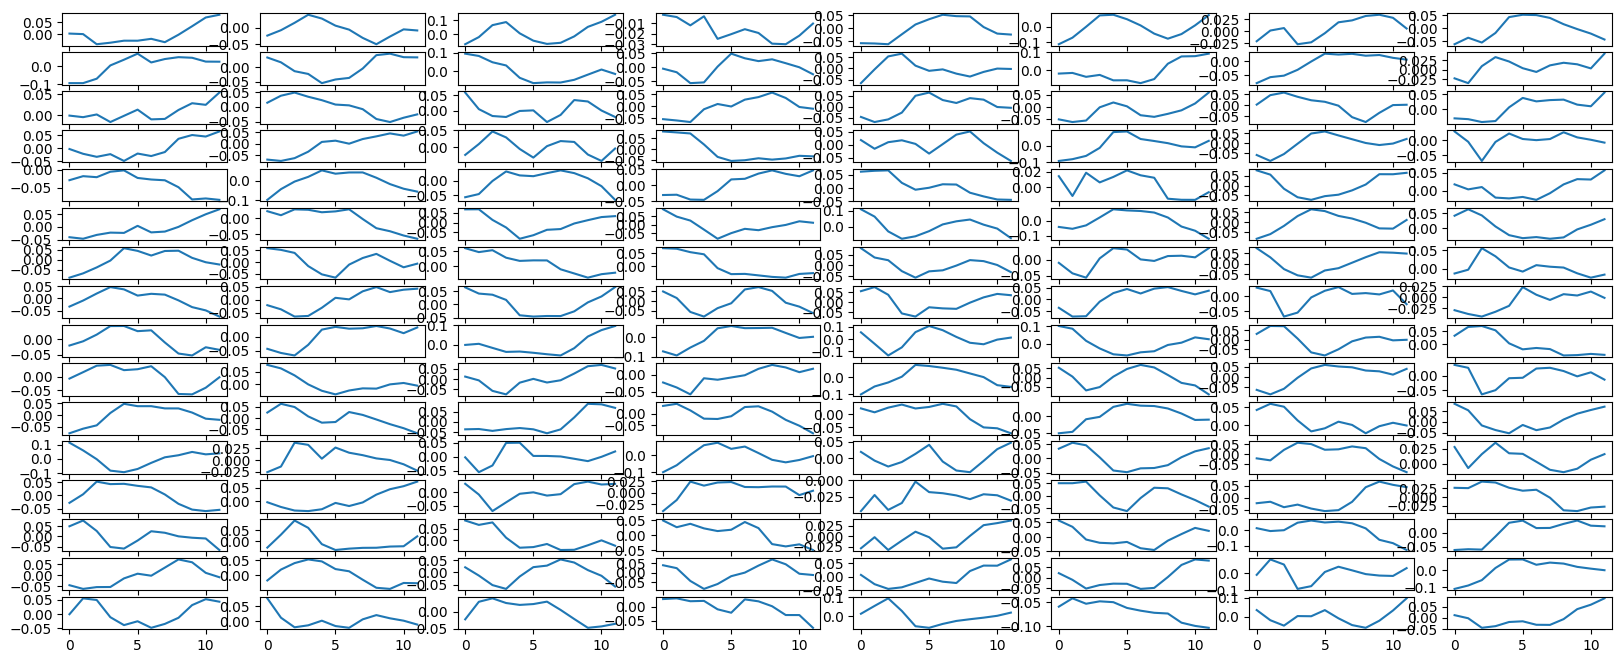

In [407]:
plot_weights('filter1',16,8)

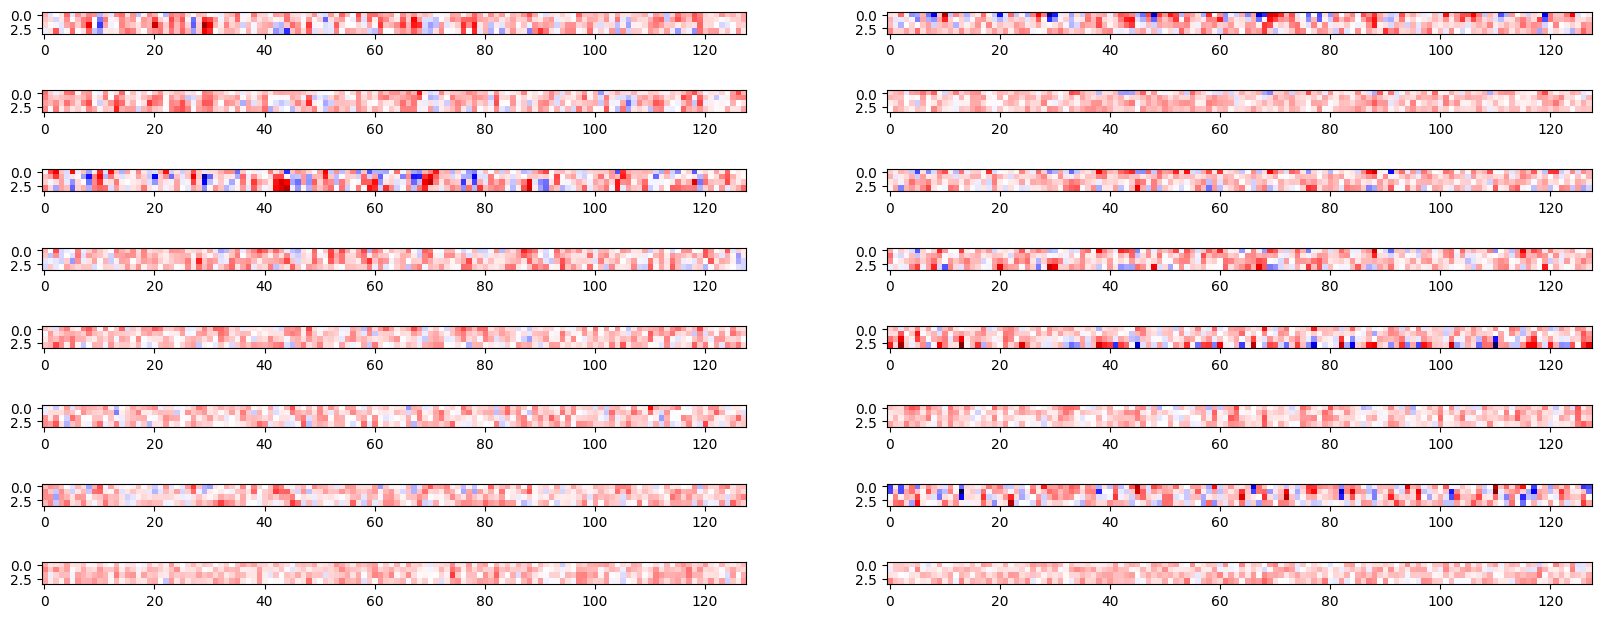

In [408]:
plot_weights('filter2',8,2)

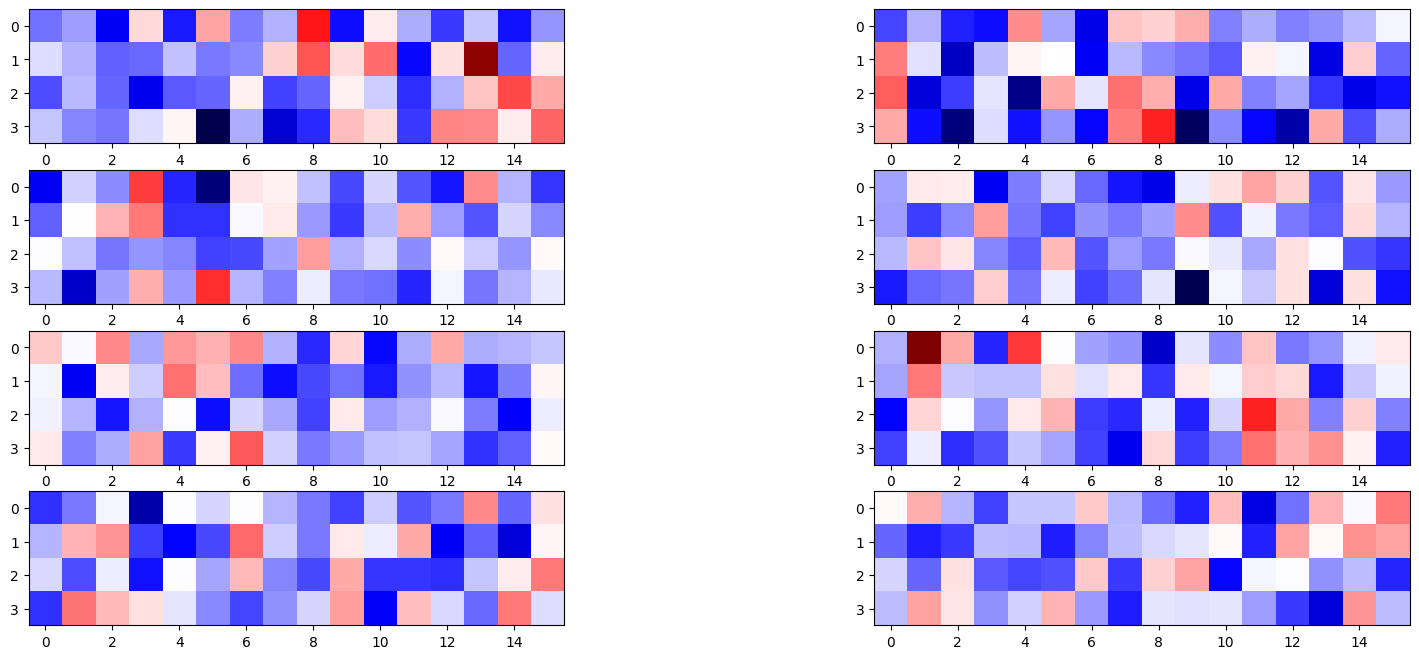

In [409]:
plot_weights('filter3',4,2)

# Testing on unlabled data

In [17]:
def maplabel(p, seq):
        
        pred_y = np.zeros((len(p),seq))

        for i in range(len(p)):
            a = np.argmax(np.reshape(p[i], (seq,3)) , axis=1) 
            # mapping 0 in 0, 1 in 1, 2 in -1
            pred_y[i] = a*5/2 -3/2*a*a

        return pred_y

def reduce(pred_y, x_test, sequence_length, labeled, y_test=0):
        if labeled == False:
                for i in range(len(pred_y)-sequence_length+1):
                        if i==0:
                                pred_y_plot = np.column_stack( ( pred_y[i], x_test[i], np.arange(i,i+sequence_length,1)) )
                        else:
                                pred_y_plot = np.row_stack( (pred_y_plot, np.column_stack( ( pred_y[i], x_test[i], np.arange(i,i+sequence_length,1)) ))) 
                df = pd.DataFrame(pred_y_plot,  columns=['pred','x_test','ind'])
                df = df.groupby('ind').mean('pred','x_test')   

        else:
                for i in range(len(pred_y)-sequence_length+1):
                        if i==0:
                                pred_y_plot = np.column_stack( ( pred_y[i], x_test[i], y_test[i], np.arange(i,i+sequence_length,1)) )
                        else:
                                pred_y_plot = np.row_stack( (pred_y_plot, np.column_stack( ( pred_y[i], x_test[i], y_test[i], np.arange(i,i+sequence_length,1)) ))) 
                df = pd.DataFrame(pred_y_plot,  columns=['pred','x_test','y_test','ind'])
                df = df.groupby('ind').mean('pred','x_test','y_test')
               
        return(df) 

In [18]:
# create input/output sequences for LSTM
X = []

for i in range(len(datatest) - sequence_length):
   # if sum(data[i:i+sequence_length, 4]) == 1: 
        X.append(datatest[i:i+sequence_length, [1]])

X = np.array(X)

print(f'Training shape: {X.shape}')

Training shape: (99143, 25, 1)


In [19]:
p = model.predict(X)

y_test = maplabel(p, sequence_length)

df = reduce(y_test, X, sequence_length, False)

3099/3099 [==============================] - 2s 538us/step


In [20]:
import plotly.graph_objects as go

threshold = 0.2

fig = go.Figure()
fig.add_trace(go.Scatter(x= np.arange(0,len(df['pred']),1), y= df['x_test'], name='Data'))
fig.add_trace(go.Scatter(x= np.where(df['pred']>threshold)[0], y= df['x_test'][df['pred']>threshold], name='Label',mode='markers', marker = dict(color="red")))
fig.add_trace(go.Scatter(x= np.where(df['pred']<-1*threshold)[0], y= df['x_test'][df['pred']<-1*threshold], name='Label',mode='markers', marker = dict(color="green")))